# Scikit-learn

In [94]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
cali =fetch_california_housing(as_frame = True)

X= cali.data  # features
y=cali.target # house prices


In [13]:
X.shape

(20640, 8)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [19]:
# First create the OBJECT

model = KNeighborsRegressor()

model.fit(X,y)

KNeighborsRegressor()

In [33]:
# making a pipeline

# list of tuples , pair of a name and step

pipe = Pipeline([
    ('scale', StandardScaler(),),
    ('Model', KNeighborsRegressor())
])

In [34]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('Model', KNeighborsRegressor())])

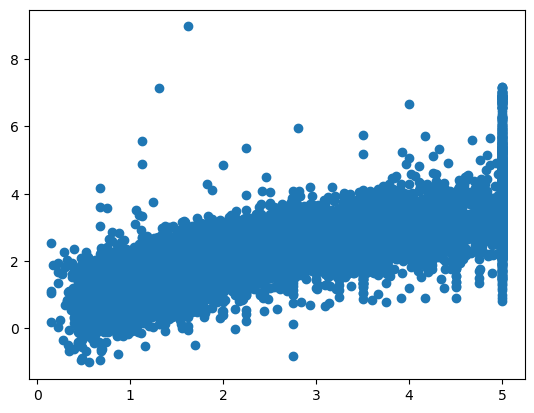

In [45]:
pred = model.predict(X)

plt.scatter(y,pred)    # differente values of what i predict 

### A lot of noise and maybe some correlation

KNeighborsRegressor checks for the nearest 5 points and with the mean of it, decides and make the prediction
Thins to consider : 

1. The columns in X can have a very different scale and this can impact the prevision, ex distance in km and area in square feat . So both axes will have different behaviors. This means that maybe because of the scaling, one feature can have way more impact in the prevision than i want
2. A pipeline can be very useful to use for a large quantity of data and used in this process

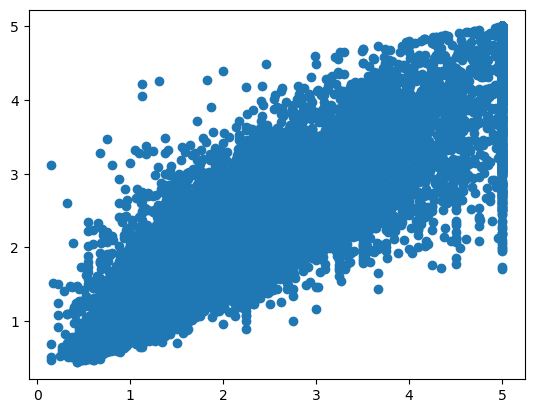

In [36]:
with_scaling = pipe.predict(X)

plt.scatter(y,with_scaling)

### Looks like picking the same model but doing a SCALING before the model, really makes a difference with less noise

But now there is a new problem : We are learning from the SAME DATA we are judging !!! it is like making a test with questions that we had already seen before, exatcly the sames

-> this changes the model into too optimistic

Changing the model of KN to see only ONE neighboor , things change

In [43]:
pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("Modeling", KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X,y)

Pipeline(steps=[('scaling', StandardScaler()),
                ('Modeling', KNeighborsRegressor(n_neighbors=1))])

In [49]:
pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('Modeling', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaling': StandardScaler(),
 'Modeling': KNeighborsRegressor(n_neighbors=1),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'Modeling__algorithm': 'auto',
 'Modeling__leaf_size': 30,
 'Modeling__metric': 'minkowski',
 'Modeling__metric_params': None,
 'Modeling__n_jobs': None,
 'Modeling__n_neighbors': 1,
 'Modeling__p': 2,
 'Modeling__weights': 'uniform'}

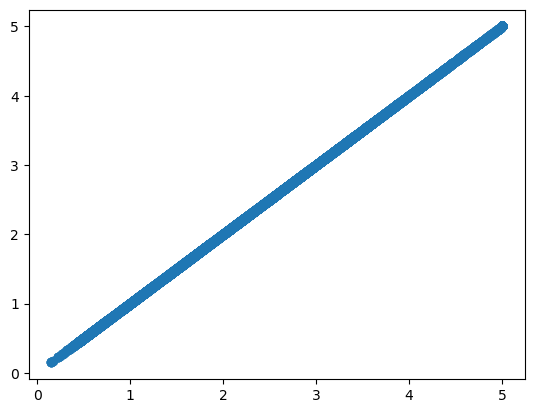

In [46]:
new_scale = pipe.predict(X)

plt.scatter(y,new_scale)

### Of course !! They use the same data for training and evaluating . Thus it considers the data itself and knows the answer. it memorizes the original data. -> -> OVERFITING

We want to predict data not seen before 

In [54]:
# turn the pipeline into a GridSearchCV

# estimator has a fit and predict method
# param - all the settings i want to change, as n_neighbors and KneighborsRegressor
# 'Modeling__n_neighbors': 1,
# cv = cross validation

mod = GridSearchCV( estimator=pipe,
                    param_grid= {'Modeling__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                    cv=3)

In [58]:
mod.fit(X,y)

# We have all the settings here

# for every cross validation i can check it 
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005432,0.002409,0.096078,0.007744,1,{'Modeling__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.003523,0.000331,0.105761,0.010161,2,{'Modeling__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.003464,0.000167,0.122639,0.017733,3,{'Modeling__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.003808,0.000463,0.124767,0.008336,4,{'Modeling__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.003782,0.000226,0.136005,0.009764,5,{'Modeling__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.003577,0.000157,0.132138,0.008040,6,{'Modeling__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.003759,0.000186,0.138268,0.009046,7,{'Modeling__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.003796,0.000206,0.142569,0.014381,8,{'Modeling__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.003611,0.000218,0.142834,0.009786,9,{'Modeling__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.003600,0.000165,0.148221,0.009326,10,{'Modeling__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


# Preprocessing

In [66]:
# just some random data to work with and try to predict 'a'
draw_data = {'x' : [52.3040,260.3012,120.7603], 
             'y': [280.1020,220.2304,302.3020], 
             'z' : ['a','a','a']}

# i will transform it to a df to work better
df = pd.DataFrame(draw_data)

In [65]:
df.head()

,x,y,z
0,52.3040,280.1020,a
1,260.3012,220.2304,a
2,120.7603,302.3020,a


In [67]:
# Features X and goal Y

X = df[['x','y']].values
y = df['z'] == 'a'

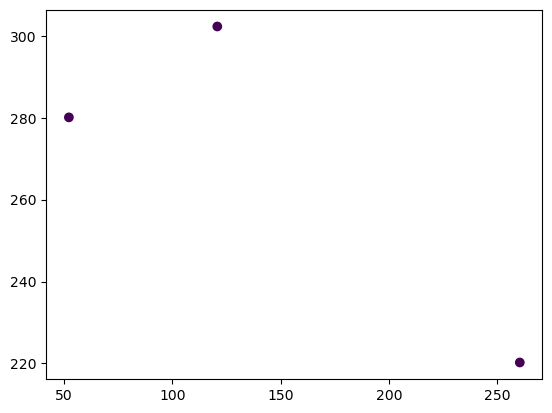

In [73]:
# what this dataset looks like

plt.scatter(X[:,0],X[:,1],c=y) 

# c = y will color the dots that represent the class value of the point 

In [76]:
# There are not enough numbers on this dataset, i will use a csv

df = pd.read_csv('drawndata1.csv')
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [77]:
X = df[['x','y']].values    # Features used
y= df['z'] == 'a'           # True and false

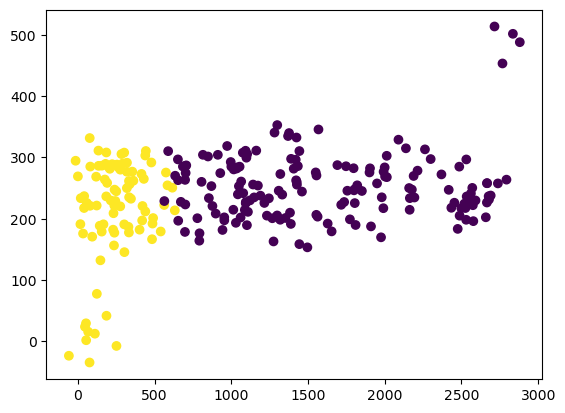

In [78]:
plt.scatter(X[:,0],X[:,1], c=y)
# c = y makes the map with colours based on true and false

In [81]:
# X and Y are in totally different scales and this will impact the forecast

X_scaled = StandardScaler().fit_transform(X)

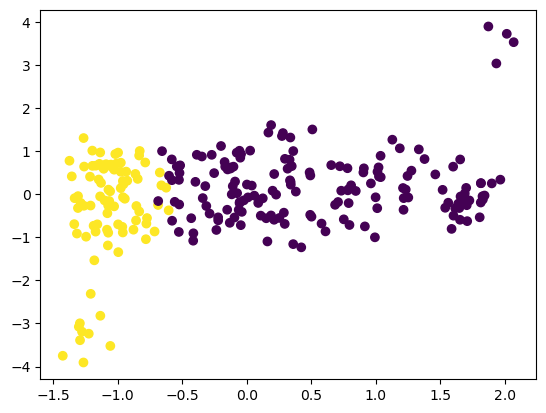

In [82]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y)


### Now both axis have similar numbers. But y has 8 units and X has 3,5 units !!

The outliers are still there. Maybe there is another way of scaling this


(array([ 88., 197., 181., 113.,  99.,  87.,  61.,  43.,  34.,  22.,  15.,
         12.,  14.,  11.,   3.,   5.,   2.,   3.,   1.,   1.,   2.,   1.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([-1.75021603,  0.94924393,  3.64870389,  6.34816385,  9.04762381,
        11.74708376, 14.44654372, 17.14600368, 19.84546364, 22.5449236 ,
        25.24438356, 27.94384351, 30.64330347, 33.34276343, 36.04222339,
        38.74168335, 41.44114331, 44.14060327, 46.84006322, 49.53952318,
        52.23898314, 54.9384431 , 57.63790306, 60.33736302, 63.03682298,
        65.73628293, 68.43574289, 71.13520285, 73.83466281, 76.53412277,
        79.23358273]),
 <BarContainer object of 30 artists>)

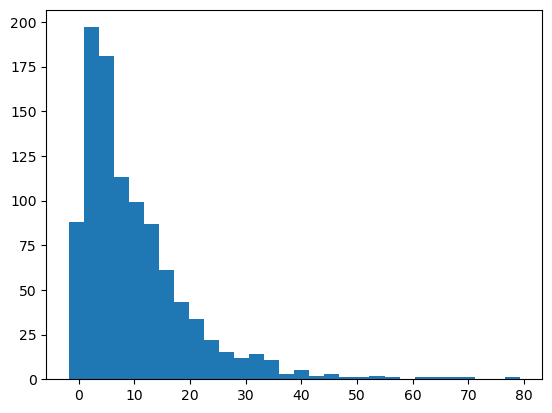

In [84]:
# Generates 1000 random points from an exponential distribution of mean 10
# Generates 1000 points from a gaussian with mean 0 and std = 1

# So i am taking the exp distribution and adding some noise from the Gaussian
scale_test = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000))

# Histogram of 30 bins from this noisy values
plt.hist(scale_test,30)

### What if i normalize the values of the exponential 

(array([ 88., 197., 181., 113.,  99.,  87.,  61.,  43.,  34.,  22.,  15.,
         12.,  14.,  11.,   3.,   5.,   2.,   3.,   1.,   1.,   2.,   1.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([-1.17707573, -0.90808901, -0.6391023 , -0.37011558, -0.10112886,
         0.16785786,  0.43684458,  0.7058313 ,  0.97481802,  1.24380474,
         1.51279145,  1.78177817,  2.05076489,  2.31975161,  2.58873833,
         2.85772505,  3.12671177,  3.39569849,  3.66468521,  3.93367192,
         4.20265864,  4.47164536,  4.74063208,  5.0096188 ,  5.27860552,
         5.54759224,  5.81657896,  6.08556567,  6.35455239,  6.62353911,
         6.89252583]),
 <BarContainer object of 30 artists>)

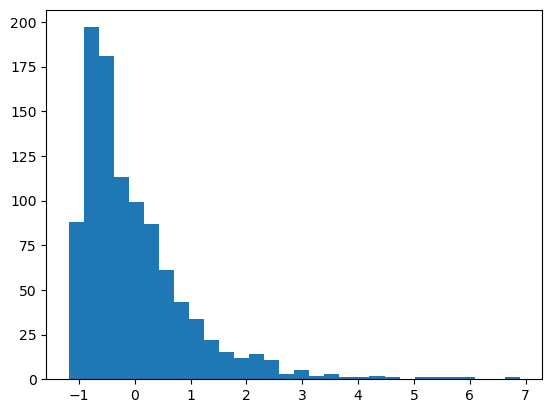

In [85]:
plt.hist((scale_test - np.mean(scale_test))/np.std(scale_test),30)

### Now the numbers of x -axis are scaled but i still have outliers . Outliers make it all harder


when we normalize the distance from the outlier to the quantile is much smaller -> By using quantiles instead of sdv,i can get a more robust preprocessing if there are outliers there 

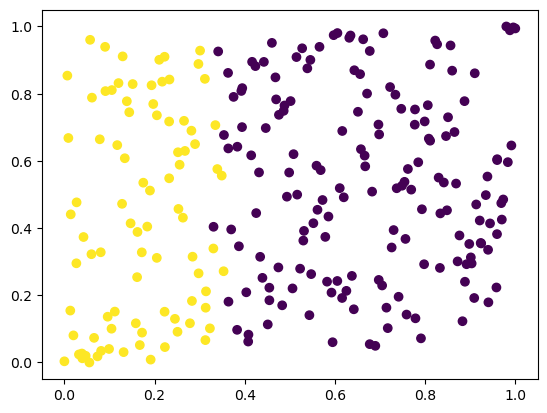

In [88]:
X_quantile= QuantileTransformer(n_quantiles= 100).fit_transform(X) # on the features !!
plt.scatter(X_quantile[:,0], X_quantile[:,1] , c=y)

Both axis are between 0 and 1 , and the clusters are still on the data but they do not have the same effect because i am using Quantiles to  transform and scale

Now it would be interesting to see the difference of these transformations

In [107]:
# I will now make a pipeline to understand the difference of these transformations

def plot_trans(scaler):
    pipe =Pipeline([
        ('scale', scaler),
        ('model', KNeighborsClassifier(n_neighbors=20 ,weights ='distance'))

    ])

    prediction = pipe.fit(X,y).predict(X)

    # Original data

    # To plot the 3 graphs i will make one row and 3 axes (columns)
    fig,axes = plt.subplots(1,3,figsize = (15,4))

    axes[0].scatter(X[:,0], X[:,1], c=y)
    axes[0].set_title ("Initial Data")

    # Transformed
    X_transform = scaler.transform(X)
    axes[1].scatter(X_transform[:,0], X_transform[:,1], c=y)
    axes[1].set_title("Transformed Data")

    # Forecast data 
    # i need to create some new data from both columns "axis = 1" because of the columns
    # unseen data and predict probabilities of the class of regions
    # Hence, i can create 10 000 random points from 0 to the max of EACH column
    rand_numbers =np.concatenate((
                            np.random.uniform(0,X[:,0].max(), (10000,1)),
                            np.random.uniform(0,X[:,1].max(), (10000,1))), 
                            axis=1)
    
    
    forecast = pipe.predict_proba(rand_numbers)
    axes[2].scatter(rand_numbers[:,0], rand_numbers[:,1], c=forecast[:,1], alpha = 0.5)
    axes[2].set_title(" Predicted Data")

    for ax in axes:
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    plt.show()



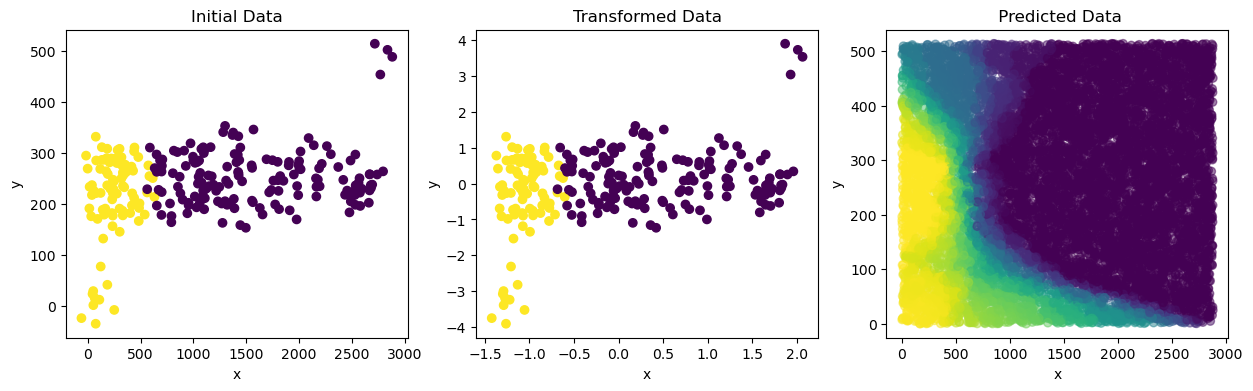

In [108]:
plot_trans(scaler=StandardScaler())

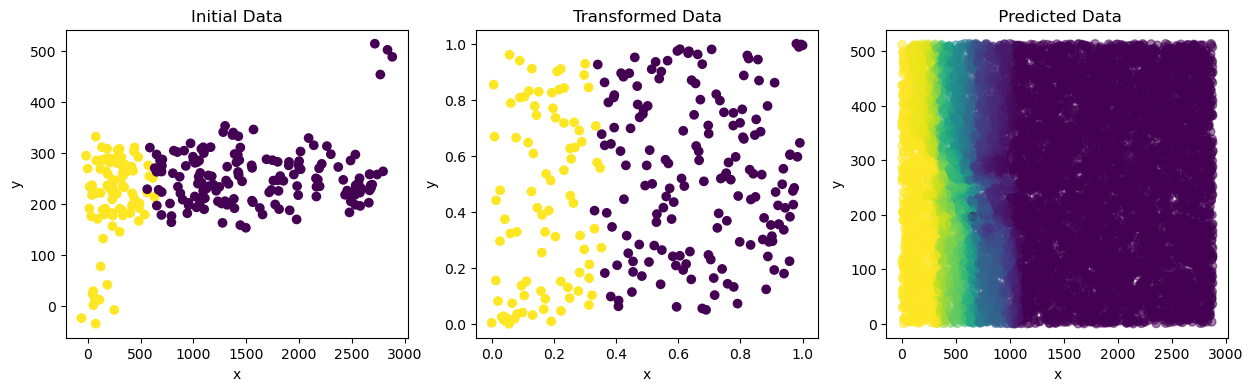

In [109]:
plot_trans(scaler= QuantileTransformer(n_quantiles=100))

### With this i can see the difference of an outlier comparing the 2 pre processing forms !!